In [1]:
from selenium import webdriver
#버전 101.0.4951.67(공식 빌드) (64비트)

In [3]:
webdriver.Chrome('chromedriver.exe')

C:\Users\yes47\AppData\Local\Temp\ipykernel_14532\884151226.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  webdriver.Chrome('chromedriver.exe')


<selenium.webdriver.chrome.webdriver.WebDriver (session="28f9b8d05636f377dea2957de58a4047")>

In [6]:
driver = webdriver.Chrome('chromedriver.exe')

C:\Users\yes47\AppData\Local\Temp\ipykernel_14532\530843676.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [7]:
# 웹페이지 접속

url = 'https://www.naver.com/'
driver.get(url)

# get -> 에러나도 에러가 뜨지 않음 아무 반응 안함

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:ur
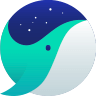
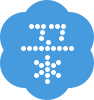

In [8]:
driver.page_source

#data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36"><head><script async="" t

In [10]:
html = driver.page_source

# 나중에 막히면 그냥 api 긁어 오면 됨

In [ ]:
# html이 소스코드를 다 가져왔어. html /html 태깅
# head, body
# h1 글자 크기
# 구문 div. class .으로 접근
# h1 > div > p
# p id >> # id 로 접근
# p 태그 밑에 span 태그. .name, .price, .inventory, .store
# href 치면 홈페이지로 넘어감
# hb> div.prepare > p # fruits1 : .fruits > span

# 돈에 관련된 크롤링은 time 꼭 해줘야함

tag 설명
- h : header
- div : division 약자. 웹사이트 layout(전체적인 틀) 만들때 주로 사용
- p : paragraph 약자. p 요소는 하나의 문단을 나타냄
- span : div 태그 유사. css 함께 쓰임
- div : 줄 바꿈이 됨 / span은 줄바꿈 안됨

In [11]:
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>   
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 닥터윌 가게 </span>
                    <a href = 'http://drwill.kr' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''


In [14]:
from bs4 import BeautifulSoup
BeautifulSoup(html, 'html.parser')

# bs4 패키지 내에서 BeautifulSoup 라이브러리


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 닥터윌 가게 </span>
<a href="http://drwill.kr"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

In [15]:
soup = BeautifulSoup(html, 'html.parser')

In [16]:
# html 정보 찾기 - tag 속성 활용

soup.select('span')

# 입력한 조건을 만족하는 태그를 모두 선택

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 닥터윌 가게 </span>,
 <span class="name"> 파인애플 </span>]

In [17]:
soup.select('p')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 닥터윌 가게 </span>
 <a href="http://drwill.kr"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

In [18]:
# id와 class로 태그 찾기

soup.select('#fruits1')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 닥터윌 가게 </span>
 <a href="http://drwill.kr"> 홈페이지 </a>
 </p>]

In [19]:
soup.select('.price')

[<span class="price"> 3000원 </span>]

In [20]:
soup.select('span.price')

[<span class="price"> 3000원 </span>]

### class와 id 속성 정리
- class
    - 글꼴, 배경색 등 서식 지정 위해 사용
    - html 내 동일한 class 여러번 사용 됨
- id
    - 특정 대상 지정하기 위해 사용 >> html 문서 내 1번만 사용
    - id 값 활용 >> 특정 태그 손쉽게 찾을 수 있음

In [21]:
# html 정보 찾기 - 상위 구조 (dom tree 구조)
soup.select('span.name')  # 태그명 : span,, class : name

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [22]:
soup.select('#fruits1 > span.name')  
# 부모 태그 : #fruits1

[<span class="name"> 바나나 </span>]

In [23]:
soup.select('div.sale > #fruits1 > span.name')
# 부모 태그 : .sale
# >> 이거 위주로

[<span class="name"> 바나나 </span>]

In [24]:
soup.select('div.sale span.name')
# div.sale 돌면서 span.name 인 것만 찾아줘

[<span class="name"> 바나나 </span>]

In [25]:
# 정보 가져오기 - 태그 그룹에서 하나의 태그 선택하기

soup.select('span.name')

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [26]:
tags = soup.select('span.name')
tags[0]

<span class="name"> 바나나 </span>

In [27]:
tags[1]

<span class="name"> 파인애플 </span>

In [28]:
tags[1].text

# text만 가져오기

' 파인애플 '

In [29]:
tags[1].text.strip()

'파인애플'

In [30]:
tags = soup.select('span.name')

for tag in tags:
    print(tag)

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


In [31]:
tags

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

- content = tag.text # tag에서 화면에 보이는 텍스트 부분만 가져오기
- attribute = tag['name'] # tag 내 속성값 가져오기

In [32]:
soup.select('a')

[<a href="http://drwill.kr"> 홈페이지 </a>]

In [33]:
tags = soup.select('a')

In [34]:
tag = tags[0]
content=tag.text

In [35]:
tag

<a href="http://drwill.kr"> 홈페이지 </a>

In [36]:
content

' 홈페이지 '

In [37]:
tag['href']

'http://drwill.kr'